In [1]:
# -*- coding: utf-8 -*-

In [2]:
from __future__ import unicode_literals

In [3]:
%load_ext autoreload

In [4]:
%autoreload 1

In [5]:
%matplotlib inline

In [6]:
import sys
import os

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

import recast
%aimport classifier
%aimport ecdf

In [7]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
# matplotlib.rc('font', family='Arial')
## for Palatino and other serif fonts use:
# rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

In [52]:
python_file = 'recast.py'
# trace = '../traces/USC/usc-parsed.trace'
trace = '../traces/USC/usc_filter.txt'
# trace = '../traces/dartmouth/dartmouth-parsed.trace'
# trace = '../traces/dartmouth/dartmouth_filter.txt'
timestep = '86400'
sys.argv = [python_file, trace, timestep]
path = os.path.split(trace)[0]
trace_name = os.path.split(trace)[1].split('.')[0]

In [53]:
recast.main()

--- -- --- -- --- -- ---
-- reading input file ../traces/USC/usc_filter.txt -- 
--- -- --- -- --- -- ---
-- Generating temporal graphs --
lowest time value is = 0
keys generated:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]
generated event graph [#edges = 61469] for timestep 0
generated event graph [#edges = 76295] for timestep 1
generated event graph [#edges = 43027] for timestep 2
generated event graph [#edges = 21304] for timestep 3
generated event graph [#edges = 39436] for timestep 4
generated event graph [#edges = 106031] for timestep 5
generated event graph [#edges = 118276] for timestep 6
generated event graph [#edges = 103712] for timestep 7
generated event graph [#edges = 89213] for timestep 8
generated event graph [#edges = 45566] for timestep 9
generated event graph [#edges = 45537] for timestep 10
generated event graph [#edges = 57926] for timestep 11
generated event graph [#edges = 95771] for timestep 12
genera

# Clustering coefficient

###### Slow, depending on the size of the graph

In [12]:
def clustering(graphs):
    l = []
    for k, graph in graphs.iteritems():
        print "calculating average clustering for graph {} with #nodes = {} and #edges = {}".format(k, len(graph.nodes()), len(graph.edges()))
        l.append(nx.average_clustering(graph, count_zeros=False))
        
    return l

In [38]:
cc_x = range(1, 30)

In [30]:
# send the temporal accumulator graph
# cc_y_t = clustering(recast.temporal_accumulator_graphs)
cc_y_t = clustering(recast.temporal_graphs)

calculating average clustering for graph 0 with #nodes = 1445 and #edges = 61469
calculating average clustering for graph 1 with #nodes = 1604 and #edges = 76295
calculating average clustering for graph 2 with #nodes = 1154 and #edges = 43027
calculating average clustering for graph 3 with #nodes = 766 and #edges = 21304
calculating average clustering for graph 4 with #nodes = 974 and #edges = 39436
calculating average clustering for graph 5 with #nodes = 1937 and #edges = 106031
calculating average clustering for graph 6 with #nodes = 2053 and #edges = 118276
calculating average clustering for graph 7 with #nodes = 1842 and #edges = 103712
calculating average clustering for graph 8 with #nodes = 1781 and #edges = 89213
calculating average clustering for graph 9 with #nodes = 1244 and #edges = 45566
calculating average clustering for graph 10 with #nodes = 981 and #edges = 45537
calculating average clustering for graph 11 with #nodes = 1035 and #edges = 57926
calculating average cluste

In [31]:
# send the random temporal accumulator graph
# cc_y_r = clustering(recast.random_temporal_accumulator_graphs)
cc_y_r = clustering(recast.random_graphs)

calculating average clustering for graph 0 with #nodes = 1445 and #edges = 61506
calculating average clustering for graph 1 with #nodes = 1604 and #edges = 76418
calculating average clustering for graph 2 with #nodes = 1154 and #edges = 42741
calculating average clustering for graph 3 with #nodes = 766 and #edges = 21194
calculating average clustering for graph 4 with #nodes = 974 and #edges = 39494
calculating average clustering for graph 5 with #nodes = 1937 and #edges = 105852
calculating average clustering for graph 6 with #nodes = 2053 and #edges = 118192
calculating average clustering for graph 7 with #nodes = 1842 and #edges = 103442
calculating average clustering for graph 8 with #nodes = 1781 and #edges = 88553
calculating average clustering for graph 9 with #nodes = 1244 and #edges = 45950
calculating average clustering for graph 10 with #nodes = 981 and #edges = 45585
calculating average clustering for graph 11 with #nodes = 1035 and #edges = 57966
calculating average cluste

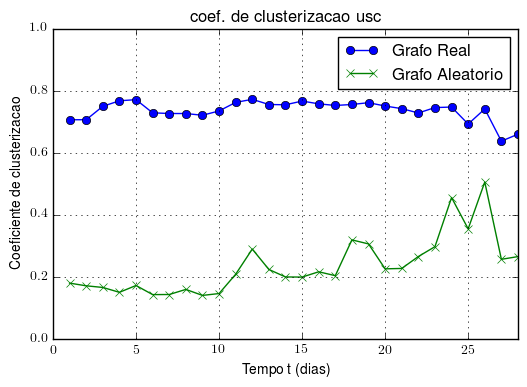

In [40]:
plt.plot(cc_x, cc_y_t, marker='o', label='Grafo Real')
plt.plot(cc_x, cc_y_r, marker='x', label='Grafo Aleatorio')
plt.title('coef. de clusterizacao ' + trace_name.split('_')[0])
plt.ylim(0, 1)
plt.xlim(0, 28)
plt.ylabel("Coeficiente de clusterizacao")
plt.xlabel("Tempo t (dias)")
plt.legend()
plt.grid()

# Edge persistence

In [59]:
ep = classifier.get_ep(recast.temporal_graphs)
flatten_ep = np.array(ep.values()).flatten()

generating edge_persistence
#edges = 1222762
#edges = 1222762


In [60]:
random_ep = classifier.get_ep(recast.random_graphs)
flatten_random_ep = np.array(random_ep.values()).flatten()

generating edge_persistence
#edges = 1908006
#edges = 1908006


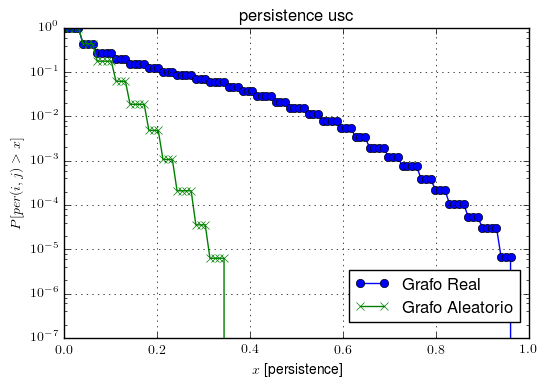

In [61]:
x = np.linspace(0.0, 1.0, 100)
y = ecdf.calc_ecdf(flatten_ep)
y_r = ecdf.calc_ecdf(flatten_random_ep)

# yrange = [0, 10**(-6), 10**(-3), 10**(0)]
# ylabels = ['10^-6', '10^-3', '10^-0']

plt.plot(x, y, marker='o', label='Grafo Real')
plt.plot(x, y_r, marker='x', label='Grafo Aleatorio')

plt.yscale('log', basey=10)
plt.xlim(0, 1)
plt.ylim ([10**(-7), 10**(0)])

plt.title("persistence " + trace_name.split('_')[0])

plt.ylabel('$P[per(i, j) > x]$')
plt.xlabel('$x$ [persistence]')

plt.legend(bbox_to_anchor=(0.98,0.05), loc=4, borderaxespad=0.)
# plt.legend()
plt.grid()
plt.show()



In [684]:
classifier.get_x(random_ep, 0.001)

0.011101581856298837

# topological overlap

In [62]:
to = classifier.get_to(recast.aggregated_graph)
flatten_to = np.array(to.values()).flatten()

generating topological overlap


In [63]:
random_to = classifier.get_to(recast.random_aggregated_graph)
flatten_random_to = np.array(random_to.values()).flatten()

generating topological overlap


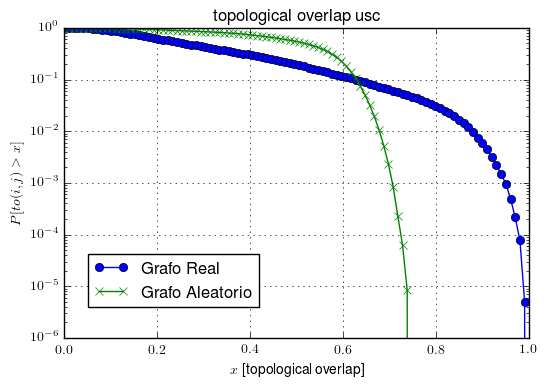

In [64]:
x = np.linspace(0.0, 1.0, 100)
y = ecdf.calc_ecdf(flatten_to)
y_r = ecdf.calc_ecdf(flatten_random_to)

# yrange = [0, 10**(-6), 10**(-3), 10**(0)]
# ylabels = ['10^-6', '10^-3', '10^-0']

plt.plot(x, y, marker='o', label='Grafo Real')
plt.plot(x, y_r, marker='x', label='Grafo Aleatorio')

plt.yscale('log', basey=10)
plt.xlim(0, 1)
# plt.ylim ([10**(-8), 10**(0)])
plt.ylim ([10**(-6), 10**(0)])

plt.title("topological overlap " + trace_name.split('_')[0])

plt.ylabel(r'$P[to(i, j) > x]$')
plt.xlabel("$x$ [topological overlap]")

plt.legend(bbox_to_anchor=(0.05, 0.1), loc='lower left', borderaxespad=0.)
# plt.legend()
plt.grid()
plt.show()



In [ ]:
classifier.get_x(random_to, 1e-3)

# tempo

In [54]:
delta = classifier.get_delta(recast.temporal_graphs)
flatten_delta = np.array(delta.values()).flatten()

In [55]:
classifier.set_delta (recast.random_graphs, recast.temporal_graphs)

before len(t) = 1627463
after len(t) = 1559


In [56]:
random_delta = classifier.get_delta(recast.random_graphs)
flatten_random_delta = np.array(random_delta.values()).flatten()

### teste

In [ ]:
# tgraph = {
#     0: nx.Graph([ (0, 1, {'delta': 10}), (1, 2, {'delta': 1}) ]),
#     1: nx.Graph([ (0, 1, {'delta': 9}), (1, 2, {'delta': 1}), (0, 2, {'delta': 1}) ]),
#     2: nx.Graph([ (0, 1, {'delta': 12}), (1, 2, {'delta': 1}), (0, 2, {'delta': 1}) ]),
# }

# rgraph = {
#     0: nx.Graph([ (0, 1, {'delta': 1}), (1, 2, {'delta': 9}) ]),
#     1: nx.Graph([ (0, 1, {'delta': 12}), (1, 2, {'delta': 1}), (0, 2, {'delta': 1}) ]),
#     2: nx.Graph([ (0, 1, {'delta': 1}), (1, 2, {'delta': 1}), (0, 2, {'delta': 12}) ]),
# }

# delta = classifier.get_delta(tgraph)
# flatten_delta = np.array(delta.values()).flatten()
# random_delta = classifier.get_delta(rgraph)
# flatten_random_delta = np.array(random_delta.values()).flatten()

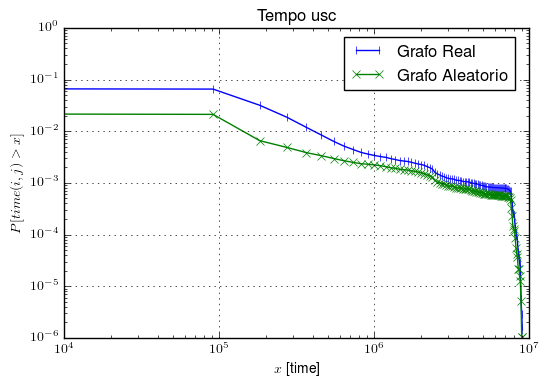

In [58]:
x = np.linspace(
    0,
    np.max(np.append (flatten_delta, flatten_random_delta)),
    100
)

y = ecdf.calc_ecdf(flatten_delta, linspace=x)
y_r = ecdf.calc_ecdf(flatten_random_delta, linspace=x)

plt.plot(x, y, marker='|', label='Grafo Real')
plt.plot(x, y_r, marker='x', label='Grafo Aleatorio')

plt.yscale('log')
plt.xscale('log')

# plt.xlim(0, 1e2)
# plt.ylim ([0.8, 1])


plt.title("Tempo " + trace_name.split('_')[0])

plt.ylabel(r'$P[time(i, j) > x]$')
plt.xlabel("$x$ [time]")

plt.legend(bbox_to_anchor=(0.97, 0.97), loc='upper right', borderaxespad=0.)
plt.grid()

plt.show()



In [ ]:
aux = 0
pr = 1e0
x = classifier.get_x(random_delta, pr)
for i in delta.itervalues():
    if i > 86400*3:
        aux += 1

print aux

In [ ]:
classifier.get_x(random_delta, 1e-6)

In [ ]:
aux = 0
pr = 1e0
x = classifier.get_x(random_delta, pr)
for i in delta.itervalues():
    if i > x:
        aux += 1

print (aux*100.0)/len(delta)

# Classify results

In [251]:
p_rnd = [10**(-6), 10**(-5), 10**(-4), 10**(-3)]

In [252]:
def classify (ep, random_ep, to, random_to, p_rnd):
    # print 'classifying edge persistence'
    # rep = classify_ep (ep, random_ep, p_rnd)

    # print 'classifying topological overlap'
    # rto = classify_to (to, random_to, p_rnd)
    
    # print 'combining edge persistence and topological overlap'
    # relations = classify_relationships (rep, rto)
    # return relations

    x_ep = classifier.get_x (random_ep, p_rnd)
    x_to = classifier.get_x (random_to, p_rnd)
    
    print x_ep, x_to
    
    x_to -= 0.15

    relations = dict()

    for edge in recast.aggregated_graph.edges_iter():#ep.iterkeys():
        if (ep[edge] > x_ep and to[edge] > x_to):
            relations[edge] = classifier.friends
        elif (ep[edge] <= x_ep and to[edge] > x_to):
            relations[edge] = classifier.acquaintance
        elif (ep[edge] > x_ep and to[edge] <= x_to):
            relations[edge] = classifier.bridges
        else:
            relations[edge] = classifier.random

    return relations

In [253]:
results = []
for p in p_rnd:
#     results.append(classifier.classify(ep, random_ep, to, random_to, p))
    print 'classify for p_rnd', p
    results.append(classify(ep, random_ep, to, random_to, p))
    print


classify for p_rnd 1e-06
0.344827586207 0.744606413994

classify for p_rnd 1e-05
0.310344827586 0.737085137085

classify for p_rnd 0.0001
0.278996865204 0.729563860176

classify for p_rnd 0.001
0.241379310345 0.707000029449



In [254]:
friends = []
random = []
bridges = []
acquaintance = []
for i in results:
    r = classifier.combine_relations(i)
    random.append(r[0])
    friends.append(r[2])
    acquaintance.append(r[3])
    bridges.append(r[4])

In [255]:
friends

[18029, 22442, 26955, 33125]

In [256]:
random

[528136, 522605, 516682, 504748]

In [257]:
bridges

[10901, 13499, 16356, 18605]

In [258]:
acquaintance

[54315, 52835, 51388, 54903]

In [259]:
map (sum, zip(friends, bridges, random, acquaintance))

[611381, 611381, 611381, 611381]

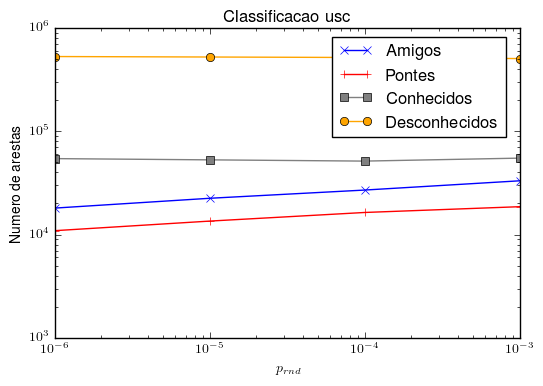

In [260]:
plt.plot(p_rnd, friends, marker='x', label='Amigos', color='blue')
plt.plot(p_rnd, bridges, marker='+', label='Pontes', color='red')
plt.plot(p_rnd, acquaintance, marker='s', label='Conhecidos', color='gray')
plt.plot(p_rnd, random, marker='o', label='Desconhecidos', color='orange')

# plt.xticks(p_rnd)

# plt.xlim ([10**(-6), 10**(-3)])
plt.yscale('log', basey=10)
plt.xscale('log', basey=10)

plt.ylim ([1e3, 1e6])

# plt.yticks(yrange, ylabels)

plt.title(r'Classificacao ' + trace_name.split('_')[0])

plt.ylabel("Numero de arestas")
plt.xlabel(r'$p_{rnd}$')

plt.legend(bbox_to_anchor=(0.97, 0.97), loc='upper right', borderaxespad=0.)

plt.show()



# Classify with time

In [235]:
p_rnd = [1e-6, 1e-5, 1e-4, 1e-3]

In [236]:
def classify (ep, random_ep, to, random_to, delta, random_delta, p_rnd):
    # print 'classifying edge persistence'
    # rep = classify_ep (ep, random_ep, p_rnd)

    # print 'classifying topological overlap'
    # rto = classify_to (to, random_to, p_rnd)
    
    # print 'combining edge persistence and topological overlap'
    # relations = classify_relationships (rep, rto)
    # return relations
    
    def rev_edge (edge):
        if (edge not in delta):
            return (edge[1], edge[0])
        return edge

    x_ep = classifier.get_x (random_ep, p_rnd)
    x_to = classifier.get_x (random_to, p_rnd)
    x_time = classifier.get_x(random_delta, p_rnd)

    x_to -= 0.15
    
    print x_ep, x_to, x_time

    relations = dict()

    for edge in ep.iterkeys():
        if (ep[edge] > x_ep and to[edge] > x_to and delta[rev_edge(edge)] > x_time):
            relations[edge] = 'ppp'
        elif (ep[edge] > x_ep and to[edge] > x_to and delta[rev_edge(edge)] <= x_time):
            relations[edge] = 'ppn'
        elif (ep[edge] > x_ep and to[edge] <= x_to and delta[rev_edge(edge)] > x_time):
            relations[edge] = 'pnp'
        elif (ep[edge] > x_ep and to[edge] <= x_to and delta[rev_edge(edge)] <= x_time):
            relations[edge] = 'pnn'
        elif (ep[edge] <= x_ep and to[edge] > x_to and delta[rev_edge(edge)] > x_time):
            relations[edge] = 'npp'
        elif (ep[edge] <= x_ep and to[edge] > x_to and delta[rev_edge(edge)] <= x_time):
            relations[edge] = 'npn'
        elif (ep[edge] <= x_ep and to[edge] <= x_to and delta[rev_edge(edge)] > x_time):
            relations[edge] = 'nnp'
        elif (ep[edge] <= x_ep and to[edge] <= x_to and delta[rev_edge(edge)] <= x_time):
            relations[edge] = 'nnn'

    return relations

In [237]:
results = []
for i, p in enumerate(p_rnd):
#     results.append(classifier.classify(ep, random_ep, to, random_to, p))
    print 'classify for p_rnd', p
    results.append(classify(ep, random_ep, to, random_to, delta, random_delta, p))
    print


classify for p_rnd 1e-06
0.344827586207 0.594606413994 9018572.0

classify for p_rnd 1e-05
0.310344827586 0.587085137085 8836378.64646

classify for p_rnd 0.0001
0.278996865204 0.579563860176 8107605.23232

classify for p_rnd 0.001
0.241379310345 0.557000029449 2732901.30303



In [238]:
ppp, ppn, pnp, pnn, npp, npn, nnp, nnn = [], [], [], [], [], [], [], []
for i in results:
    r = classifier.combine_relations_with_time(i)
    ppp.append(r['ppp'])
    ppn.append(r['ppn'])
    pnp.append(r['pnp'])
    pnn.append(r['pnn'])
    npp.append(r['npp'])
    npn.append(r['npn'])
    nnp.append(r['nnp'])
    nnn.append(r['nnn'])

In [239]:
map (sum, zip(ppp, ppn, pnp, pnn, npp, npn, nnp, nnn))

[1222762, 1222762, 1222762, 1222762]

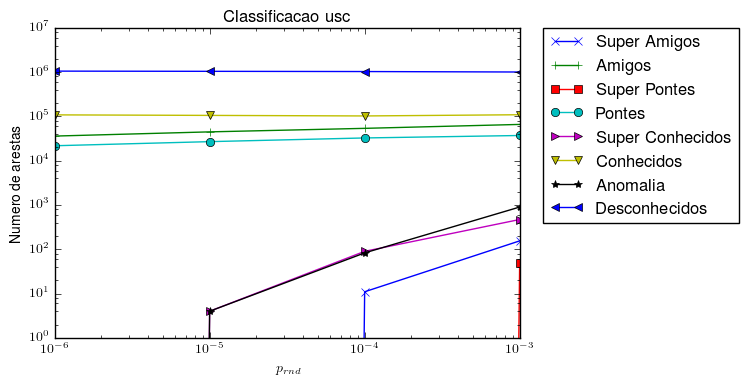

In [240]:
plt.plot(p_rnd, ppp, marker='x', label='Super Amigos', )
plt.plot(p_rnd, ppn, marker='+', label='Amigos', )
plt.plot(p_rnd, pnp, marker='s', label='Super Pontes', )
plt.plot(p_rnd, pnn, marker='o', label='Pontes', )
plt.plot(p_rnd, npp, marker='>', label='Super Conhecidos', )
plt.plot(p_rnd, npn, marker='v', label='Conhecidos', )
plt.plot(p_rnd, nnp, marker='*', label='Anomalia', )
plt.plot(p_rnd, nnn, marker='<', label='Desconhecidos', )

# plt.xticks(p_rnd)

# plt.xlim ([10**(-6), 10**(-3)])
plt.yscale('log', basey=10)
plt.xscale('log', basey=10)

# plt.ylim ([1e3, 1e6])

# plt.yticks(yrange, ylabels)

plt.title('Classificacao ' + trace_name.split('_')[0])


plt.ylabel("Numero de arestas")
plt.xlabel(r'$p_{rnd}$')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()



$NPP$ e $NNP$ são pessoas que não se encontram regularmente/não compartilham muitas amizades mas por algum motivo tem um tempo de encontro $T$ bem alto 

# Encontros

In [214]:
lines = [line.rstrip('\n').split(' ') for line in open(trace, 'r')]
encounters = []
for line in lines:
    encounters.append( (int(line[0]), int(line[1]) ) )
lines = []

In [243]:
def get_relations(result):
    d = dict()
    
    for e in encounters:
        try:
            r = result[e]
        except:
            r = result[(e[1], e[0])]
        if r not in d:
            d[r] = 0
        d[r] += 1
    return d

In [244]:
todo = []
for result in results:
    todo.append(get_relations(result))

In [245]:
def get_fraction(part):
    aux = []
    for t in todo:
        try:
            aux.append( 100.0 * float(t[part])/sum(t.values()) )
        except:
            aux.append(0.0)
    return aux

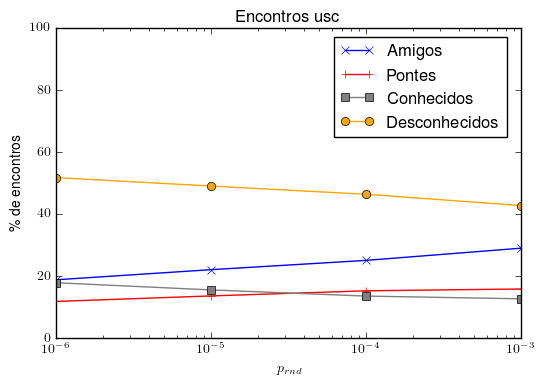

In [234]:
plt.plot(p_rnd, get_fraction(2), marker='x', label='Amigos', color='blue')
plt.plot(p_rnd, get_fraction(4), marker='+', label='Pontes', color='red')
plt.plot(p_rnd, get_fraction(3), marker='s', label='Conhecidos', color='gray')
plt.plot(p_rnd, get_fraction(0), marker='o', label='Desconhecidos', color='orange')

# plt.xticks(p_rnd)

# plt.xlim ([10**(-6), 10**(-3)])
# plt.yscale('log', basey=10)
plt.xscale('log', basey=10)

plt.ylim ([0, 100])

# plt.yticks(yrange, ylabels)

plt.title(r'Encontros ' + trace_name.split('_')[0])

plt.ylabel("\% de encontros")
plt.xlabel(r'$p_{rnd}$')

plt.legend(bbox_to_anchor=(0.97, 0.97), loc='upper right', borderaxespad=0.)

plt.show()



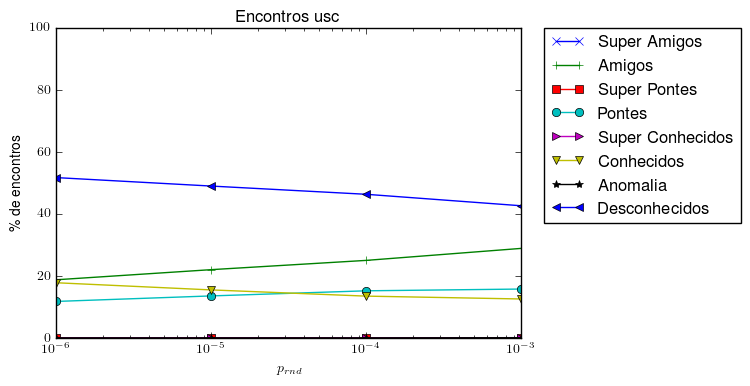

In [248]:
plt.plot(p_rnd, get_fraction('ppp'), marker='x', label='Super Amigos', )
plt.plot(p_rnd, get_fraction('ppn'), marker='+', label='Amigos', )
plt.plot(p_rnd, get_fraction('pnp'), marker='s', label='Super Pontes', )
plt.plot(p_rnd, get_fraction('pnn'), marker='o', label='Pontes', )
plt.plot(p_rnd, get_fraction('npp'), marker='>', label='Super Conhecidos', )
plt.plot(p_rnd, get_fraction('npn'), marker='v', label='Conhecidos', )
plt.plot(p_rnd, get_fraction('nnp'), marker='*', label='Anomalia', )
plt.plot(p_rnd, get_fraction('nnn'), marker='<', label='Desconhecidos', )

# plt.xticks(p_rnd)

# plt.xlim ([10**(-6), 10**(-3)])
# plt.yscale('log', basey=2)
plt.xscale('log', basey=10)

plt.ylim ([0, 100])

# plt.yticks(yrange, ylabels)

plt.title('Encontros ' + trace_name.split('_')[0])


plt.ylabel("\% de encontros")
plt.xlabel(r'$p_{rnd}$')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


# Draw

In [288]:
def combine_graphs(graphs, max_iter=28):
    iter = 0
    g = nx.Graph()
    for graph in graphs.itervalues():
        g = nx.compose(g, graph)
        iter += 1
        if iter >= max_iter:
            break
    return g

In [289]:
G = combine_graphs(recast.temporal_graphs, max_iter=14)

In [291]:
aux = []
for i, k in results[1].iteritems():
    if k == 0:
        aux.append(i)

In [292]:
G.remove_edges_from(aux)

In [308]:
edge_color = []
for e in G.edges_iter():
    try:
        k = results[1][e]
    except:
        k = results[1][(e[1], e[0])]
    if k == 0:
        continue
    elif k == 2:
        edge_color.append('darkblue')
    elif k == 3:
        edge_color.append('gray')
    else:
        edge_color.append('red')
    G.add_edge(i[0], i[1], weight=k)

In [312]:
edge_color.append('gray')

In [306]:
pos=nx.spring_layout(G, k=0.4, iterations=250)

(-0.20000000000000001,
 1.2000000000000002,
 -0.20000000000000001,
 1.2000000000000002)

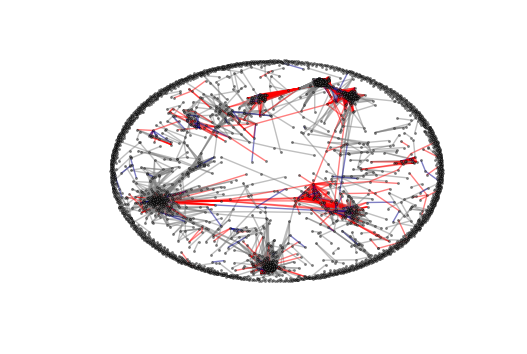

In [316]:
nx.draw_networkx_edges(G,pos,
                       alpha=0.5,
                       edge_color=edge_color,)

nx.draw_networkx_nodes(G, pos, alpha=0.5, 
                       nodeslist=G.nodes(),
                       node_size=1, 
                       node_color='#e6e6e6')
plt.axis('off')

random graph

In [317]:
G = recast.aggregated_graph.copy()

In [318]:
aux = []
for i, k in results[1].iteritems():
    if k != 0:
        aux.append(i)

In [319]:
G.remove_edges_from(aux)

In [320]:
edge_color = []
for i, k in results[1].iteritems():
    if k != 0:
        continue

In [321]:
pos=nx.spring_layout(G,k=0.5)

(-0.20000000000000001,
 1.2000000000000002,
 -0.20000000000000001,
 1.2000000000000002)

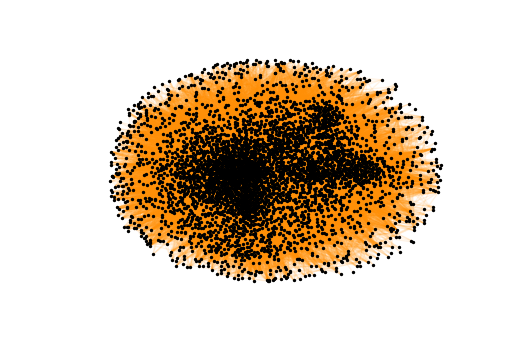

In [326]:
nx.draw_networkx_edges(G,pos,
                       alpha=0.1,
                       edge_color='darkorange',)

nx.draw_networkx_nodes(G, pos, alpha=1.0, 
                       node_size=2, 
                       node_color='black')
plt.axis('off')

# infection

In [ ]:
def get_relation (s, t):
    if (s, t) in results[0]:
        return results[0][(s, t)]
    else:
        return results[0][(t, s)]

In [ ]:
def merge_dicts (d1, d2):
    d1[-1] += d2[-1]
    d1[0] += d2[0]
    d1[2] += d2[2]
    d1[3] += d2[3]
    d1[4] += d2[4]
    
    return d1

In [ ]:
f = map (lambda x: x.strip().split(), file (os.path.join(path, 'infection_data.txt'), 'r').readlines())

In [ ]:
edges = map (lambda x: map (int, x), f[1::2])

In [ ]:
def check(arr):
    k = {0:0, 2:0, 3:0, 4:0, -1: 0}
    
    if len(arr) <= 1:
        k[-1] = 1
        return k
    
    for i in range(1, len(arr)):
        s = arr[i-1]
        t = arr[i]
        if ((s, t) in results[0] or (t, s) in results[0]) and \
            ((s, t) in results[1] or (t, s) in results[1]) and \
            ((s, t) in results[2] or (t, s) in results[2]) and \
            ((s, t) in results[3] or (t, s) in results[3]):
            # get relationship
            rel = get_relation (s, t)
            k[rel] += 1
        else:
            print s, t
            return False
    return k

In [ ]:
st = map (lambda x: map (int, x), f[0::2])

In [ ]:
d_friends = {0:0, 2:0, 3:0, 4:0, -1:0}
d_bridges = {0:0, 2:0, 3:0, 4:0, -1:0}
d_acquaintance = {0:0, 2:0, 3:0, 4:0, -1:0}
d_random = {0:0, 2:0, 3:0, 4:0, -1:0}

In [ ]:
for i in range (len(st)):
    (s, t, tempo) = st[i]
    rel = get_relation(s, t)
    
    if rel == 0:
        d_random = merge_dicts(d_random, check(edges[i]))
    elif rel == 2:
        d_friends = merge_dicts(d_friends, check(edges[i]))
    elif rel == 3:
        d_acquaintance = merge_dicts(d_acquaintance, check(edges[i]))
    else:
        d_bridges = merge_dicts(d_bridges, check (edges[i]))

In [ ]:
d_random

In [ ]:
d_friends

In [ ]:
d_acquaintance

In [ ]:
d_bridges

In [ ]:
import pandas as pd

In [ ]:
N = 4

random_v = np.divide (
    np.multiply(d_random.values(), 100.0),
    sum(d_random.values())
)

friends_v = np.divide (
    np.multiply(d_friends.values(), 100.0),
    sum(d_friends.values())
)

acquaintance_v = np.divide (
    np.multiply(d_acquaintance.values(), 100.0),
    sum(d_acquaintance.values())
)

bridges_v = np.divide (
    np.multiply(d_bridges.values(), 100.0),
    sum(d_bridges.values())
)

values = zip(random_v, friends_v, acquaintance_v, bridges_v)

# ind = np.arange(N)    # the x locations for the groups
# width = 0.5      # the width of the bars: can also be len(x) sequence


In [ ]:
df = pd.DataFrame({'random': values[0],
             'friends': values[1],
             'acquaintance': values[2],
             'bridges': values[3]})

In [ ]:
ax = df.plot(kind='bar', stacked=True, colormap='Spectral', title=trace_name.split('_')[0])
ax.legend(
    bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.
)

ax.set_xticklabels(['random', 'friends', 'acquaintance', 'bridges'], rotation=0)

ax.set_ylim(0, 100)

ax.set_ylabel("\% de mensagens entregues")
